In [2]:
import numpy as np
#import tensorflow.nn
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
from filters import *

In [3]:
# !pip install tensorflow-addons
# from tensorflow_addons.image import median_filter2d

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rc('image', cmap='jet')

HW_path = '/Users/parsa/Daneshgah/Arshad/2/DIP/HomeWorks/HW1-1400-2/'
images_path = os.path.join(HW_path, 'images')
results_path = os.path.join(HW_path, 'results')

# 5

In [6]:
image1 = plt.imread(os.path.join(images_path, '1.jpg'))
print(np.all(image1[..., 0] == image1[..., 1]), np.all(image1[..., 2] == image1[..., 1]))
image1 = image1[..., 0]
image1.shape

True True


(195, 259)

In [ ]:
plt.imshow(image1, cmap='gray')

In [8]:
image1_fft = fft(image1, list(np.array(image1.shape)))

In [ ]:
im = plt.imshow(np.log(1 + increase_contrast(image1_fft)))
plt.colorbar(im, fraction=0.035, pad=0.04)

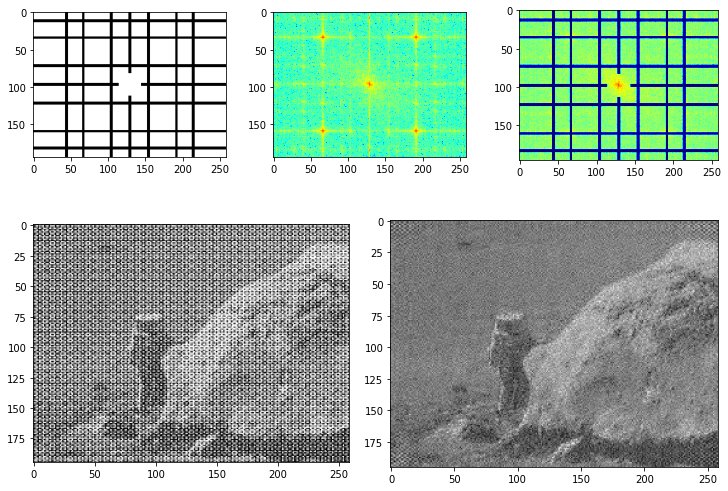

In [13]:


height, width = image1_fft.shape

zekhamat = 3

my_filter = np.logical_not(IHPF(*image1_fft.shape, 15) * np.logical_not(khat_ofoghi_filter(*image1_fft.shape, height / 2, zekhamat/2)\
            * khat_amudi_filter(*image1_fft.shape, width / 2, zekhamat/2)))
for d0 in (125, 170, 50):
    my_filter *= mian_nagozar_morabai_filter(*image1_fft.shape, d0, zekhamat)
    
new_spectrum = image1_fft[...] * my_filter

fig, axd = plt.subplot_mosaic([[0, 0, 1, 1, 3, 3],
                               [4,4,4,2, 2, 2],
                               [4,4,4,2, 2, 2]],
                              figsize=(10, 7), constrained_layout=True)


axd[0].imshow(my_filter, cmap='gray')

image1_ifft = ifft(new_spectrum, image1.shape)
axd[2].imshow(image1_ifft, cmap='gray')
axd[1].imshow(increase_contrast(image1_fft))
axd[3].imshow(increase_contrast(new_spectrum, 2))
axd[4].imshow(image1, cmap='gray')


In [ ]:

height, width = image1_fft.shape

my_filter = 1
for theta in np.arange(0,180,15):
    my_filter &= np.logical_not(khat_movarab_filter(height, width, theta, 20))
my_filter |= IHPF(height, width, 20)

new_spectrum = image1_fft[...] * my_filter

fig, axd = plt.subplot_mosaic([[0, 1],
                               [2, 2],
                               [2, 2]],
                              figsize=(10, 10), constrained_layout=True)


axd[0].imshow(my_filter, cmap='gray')
axd[1].imshow(np.log(abs(new_spectrum)+1))

image1_ifft = ifft(new_spectrum, image1.shape)
axd[2].imshow(image1_ifft, cmap='gray')
